<a href="https://colab.research.google.com/github/TongkaiYang/Vision-Zero-Madison/blob/turrkey/CS_638_weekly_plots_(10_10).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import datetime as dt
sns.set(style="white")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
raw_df = pd.read_csv('drive/My Drive/CS 638/Madison_crash_2009_2019.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



<Figure size 720x1440 with 0 Axes>

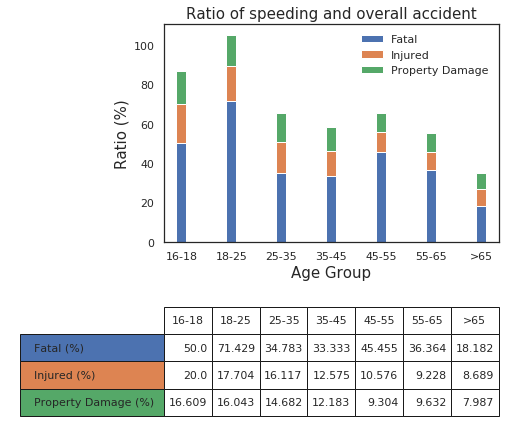

In [6]:
spd_df = raw_df[raw_df['STNM11'].str.contains('346.57').fillna(False) | raw_df['STNM12'].str.contains('346.57').fillna(False)
                | raw_df['DRVRPC1'].str.contains('SPD') | raw_df['DRVRPC1'].str.contains('TFC') | raw_df['DRVRPC1'].str.contains('FVC')]
def age_flag(df):
  if int(df['AGE1']) == 0:
    flag = None
  if int(df['AGE1']) < 18 and int(df['AGE1']) > 0:
    flag = '16-18'
  if int(df['AGE1']) >= 18 and int(df['AGE1']) < 25:
    flag = '18-25'
  if int(df['AGE1']) >= 25 and int(df['AGE1']) < 35:
    flag = '25-35'
  if int(df['AGE1']) >= 35 and int(df['AGE1']) < 45:
    flag = '35-45'
  if int(df['AGE1']) >= 45 and int(df['AGE1']) < 55:
    flag = '45-55'
  if int(df['AGE1']) >= 55 and int(df['AGE1']) < 65:
    flag = '55-65'
  if int(df['AGE1']) >= 65:
    flag = '>65'
  return flag
raw_df['AGE_FLAG'] = raw_df.dropna(subset = ['AGE1']).apply(age_flag, axis = 1)
spd_df['AGE_FLAG'] = spd_df.apply(age_flag, axis = 1)
AGE_SVR = spd_df.groupby(['AGE_FLAG','ACCDSVR']).count()['DOCTNMBR'].reset_index()
AGE_SVR['DOCTNMBR2'] = raw_df.dropna(subset = ['AGE1']).groupby(['AGE_FLAG', 'ACCDSVR']).count()['DOCTNMBR'].reset_index()['DOCTNMBR']
AGE_SVR['spd_ratio'] = round(AGE_SVR['DOCTNMBR'] / AGE_SVR['DOCTNMBR2'] * 100, 3)
AGE_SVR = pd.pivot_table(AGE_SVR, values = 'spd_ratio', index = 'AGE_FLAG', columns = 'ACCDSVR')
plt.figure(figsize = (10,20))
AGE_SVR_plt = AGE_SVR.plot(kind="bar", stacked=True, width = 0.2)
AGE_SVR_leg = AGE_SVR_plt.get_legend_handles_labels()[0]
AGE_SVR_plt.legend(AGE_SVR_leg, ['Fatal', 'Injured', 'Property Damage'], title='', frameon=False, loc='upper right')
AGE_SVR_plt.set_xticklabels(['16-18', '18-25', '25-35', '35-45', '45-55', '55-65', '>65'], rotation = 0)
AGE_SVR_plt.set_title('Ratio of speeding and overall accident', fontsize = 15)
AGE_SVR_plt.set_xlabel('Age Group', fontsize = 15)
AGE_SVR_plt.set_ylabel('Ratio (%)', fontsize = 15)
plt.table(cellText = AGE_SVR.T.values, rowLabels=['Fatal (%)', 'Injured (%)', 'Property Damage (%)'], 
          colLabels=AGE_SVR.T.columns, rowColours = ['C0', 'C1', 'C2'],
          loc = 'bottom', bbox=[0.0, -0.8, 1.0, 0.5]) #bbox = [left, bottom, width, height]

In [7]:
ALC_df = raw_df[raw_df.ALCFLAG == 'Y'].copy()
ALC_df['AGE_FLAG'] = ALC_df.dropna(subset = ['AGE1']).apply(age_flag, axis = 1)
ALC_SVR = ALC_df.groupby(['AGE_FLAG','ACCDSVR']).count()['DOCTNMBR'].reset_index()
ALC_SVR['DOCTNMBR2'] = raw_df.dropna(subset = ['AGE1']).groupby(['AGE_FLAG', 'ACCDSVR']).count()['DOCTNMBR'].reset_index()['DOCTNMBR']
ALC_SVR['alc_ratio'] = round(ALC_SVR['DOCTNMBR'] / ALC_SVR['DOCTNMBR2'] * 100, 3)
ALC_SVR = pd.pivot_table(ALC_SVR, values = 'alc_ratio', index = 'AGE_FLAG', columns = 'ACCDSVR')
ALC_SVR

ACCDSVR,FAT,INJ,PD
AGE_FLAG,,,
16-18,50.000,1.698,1.038
18-25,47.619,5.787,4.585
25-35,43.478,7.579,4.883
35-45,33.333,5.573,3.725
45-55,63.636,5.714,3.101
55-65,54.545,3.197,2.320
>65,9.091,2.363,1.386
